In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
image_size = [224, 224]


In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58889256/58889256 [==============================] - 4s 0us/step


In [7]:
!unzip '/content/Brain_CSD (1).zip'

Archive:  /content/Brain_CSD (1).zip
   creating: Brain_CSD/No_tumor/
  inflating: Brain_CSD/No_tumor/1.jpg  
  inflating: Brain_CSD/No_tumor/2.jpg  
  inflating: Brain_CSD/No_tumor/3.jpg  
  inflating: Brain_CSD/No_tumor/4.jpg  
  inflating: Brain_CSD/No_tumor/5.jpg  
  inflating: Brain_CSD/No_tumor/6.jpg  
  inflating: Brain_CSD/No_tumor/7.jpg  
  inflating: Brain_CSD/No_tumor/8.jpg  
  inflating: Brain_CSD/No_tumor/image (10).jpg  
  inflating: Brain_CSD/No_tumor/image (11).jpg  
  inflating: Brain_CSD/No_tumor/image (12).jpg  
  inflating: Brain_CSD/No_tumor/image (13).jpg  
  inflating: Brain_CSD/No_tumor/image (14).jpg  
  inflating: Brain_CSD/No_tumor/image (15).jpg  
  inflating: Brain_CSD/No_tumor/image (16).jpg  
  inflating: Brain_CSD/No_tumor/image (17).jpg  
  inflating: Brain_CSD/No_tumor/image (18).jpg  
  inflating: Brain_CSD/No_tumor/image (19).jpg  
  inflating: Brain_CSD/No_tumor/image (2).jpg  
  inflating: Brain_CSD/No_tumor/image (20).jpg  
  inflating: Brain_CSD/

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [10]:
brain_classes = []
individual_disease = []
image_paths = []
labels = []

for images in os.listdir('/content/Brain_CSD'):
    for image in os.listdir('/content/Brain_CSD/' + str(images)):
        individual_disease.append('/content/Brain_CSD/' + str(images) + '/' + str(image))
        labels.append(images)
        print(images)
        path=('/content/Brain_CSD/' + str(images) + '/' + str(image))
        img = cv2.imread(path)
        im =cv2.resize(img,(224,224))
        image_paths.append(im)
    brain_classes.append(individual_disease)
    individual_disease = []
print("Labels:", labels)

pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitar

In [11]:
d=2

In [12]:
x = Flatten()(vgg.output)

In [13]:
prediction = Dense(1, activation = 'sigmoid')(x)


In [14]:
model = Model(inputs = vgg.input, outputs = prediction)


In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [16]:
data_arr = np.array(image_paths)
label_arr = np.array(labels)

In [17]:
len(label_arr)

1401

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y= encoder.fit_transform(label_arr)
x= data_arr

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=30)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,  # Fraction of total height for random vertical shifts
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=True,  # Randomly flip inputs vertically
    fill_mode='nearest'  # Strategy for filling in newly created pixels after rotations or shifts
)


In [21]:
len(x_train)

980

In [22]:

datagen.fit(x_train)



In [23]:

augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

In [24]:
augmented_data_generator

In [25]:
mod = model.fit(
  augmented_data_generator,
  validation_data=(x_test, y_test),
  verbose=1,
  epochs=5)


Epoch 1/5
31/31 [==============================] - 34s 669ms/step - loss: 2.1540 - accuracy: 0.8041 - val_loss: 1.9679 - val_accuracy: 0.8955
Epoch 2/5
31/31 [==============================] - 16s 497ms/step - loss: 0.8807 - accuracy: 0.9194 - val_loss: 1.2162 - val_accuracy: 0.9216
Epoch 3/5
31/31 [==============================] - 15s 488ms/step - loss: 1.1862 - accuracy: 0.9265 - val_loss: 0.6560 - val_accuracy: 0.9501
Epoch 4/5
31/31 [==============================] - 15s 476ms/step - loss: 0.6080 - accuracy: 0.9520 - val_loss: 0.4561 - val_accuracy: 0.9501
Epoch 5/5
31/31 [==============================] - 17s 523ms/step - loss: 0.5347 - accuracy: 0.9408 - val_loss: 0.6306 - val_accuracy: 0.9454


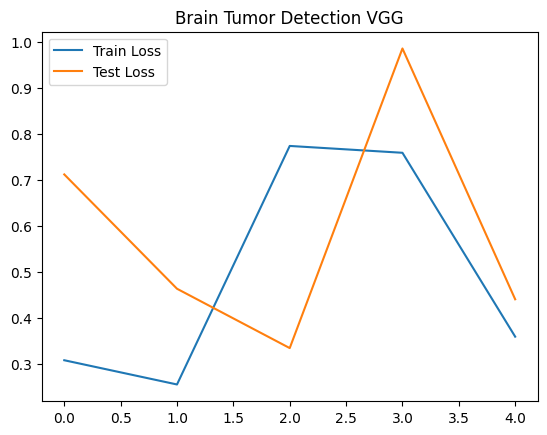

In [ ]:
plt.plot(mod.history['loss'], label='Train Loss')
plt.plot(mod.history['val_loss'], label='Test Loss')
plt.title("Brain Tumor Detection VGG")
plt.legend()
plt.show()

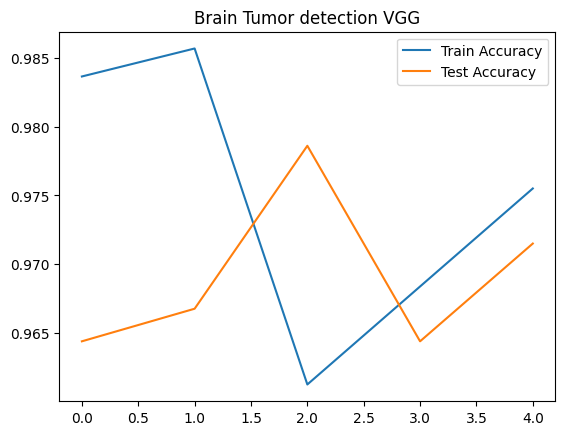

In [ ]:
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Test Accuracy')
plt.title("Brain Tumor detection VGG")
plt.legend()
plt.show()

In [26]:
y_pred=model.predict(x_test)

14/14 [==============================] - 2s 126ms/step


In [27]:
y_pred

array([[9.2718846e-01],
       [7.0785356e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9784553e-01],
       [1.0000000e+00],
       [3.1254220e-13],
       [1.0000000e+00],
       [9.9718982e-01],
       [2.5735160e-25],
       [2.7209515e-20],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.2718846e-01],
       [2.3503628e-35],
       [1.0000000e+00],
       [7.3553256e-18],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.4400679e-19],
       [1.1088282e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.7292246e-36],
       [1.3754034e-14],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.4404675e-14],
       [4.0322212e-23],
       [1.0000000e+00],
       [3.1390976e-09],
       [1.000000

In [28]:
y_pred=np.argmax(y_pred,axis=1)

In [29]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred,labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.39      1.00      0.57       166
           1       0.00      0.00      0.00       255

    accuracy                           0.39       421
   macro avg       0.20      0.50      0.28       421
weighted avg       0.16      0.39      0.22       421



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
!unzip '/brain_tumour.zip'

Archive:  /brain_tumour.zip
  inflating: brain_tumour/brain_tumour_detection.pdf  
   creating: brain_tumour/tumour/
   creating: brain_tumour/tumour/Testing/
   creating: brain_tumour/tumour/Testing/no_tumor/
  inflating: brain_tumour/tumour/Testing/no_tumor/image(1).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(10).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(100).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(101).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(102).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(103).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(104).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(11).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(12).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(13).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(14).jpg  
  inflating: brain_tumour/tumour/Testing/no_tumor/image(15).

In [39]:
path = os.listdir('/content/brain_tumour/tumour/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [41]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/brain_tumour/tumour/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [42]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [43]:
np.unique(Y)

array([0, 1])

In [44]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [45]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

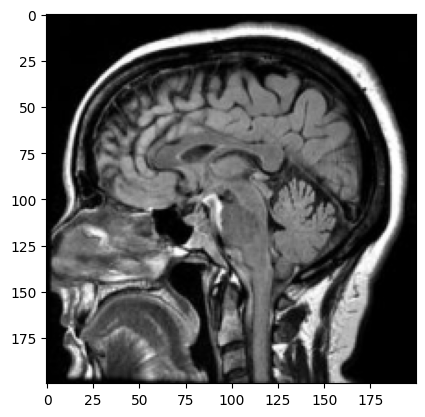

In [46]:
plt.imshow(X[0], cmap='gray')

In [47]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [49]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [50]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [51]:
from sklearn.decomposition import PCA

In [52]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [55]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [56]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9510204081632653


In [57]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.9510204081632653


In [58]:
pred = sv.predict(xtest)

In [59]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 34,  37, 120, 127, 137, 138, 147, 153, 199, 204, 222, 241]),)

In [61]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  12
1 1


In [60]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

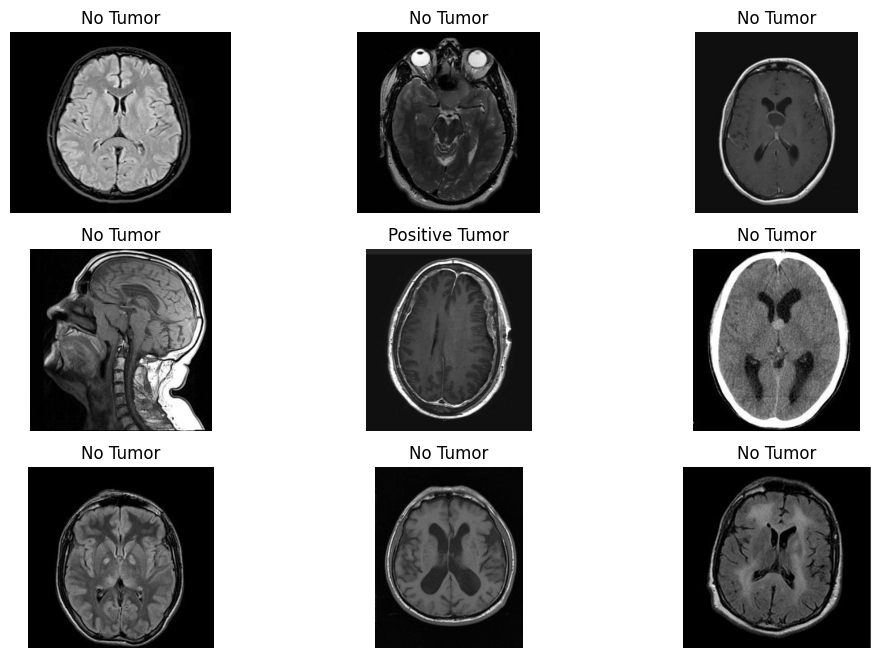

In [63]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/brain_tumour/tumour/Testing/')
c=1
for i in os.listdir('/content/brain_tumour/tumour/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/brain_tumour/tumour/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

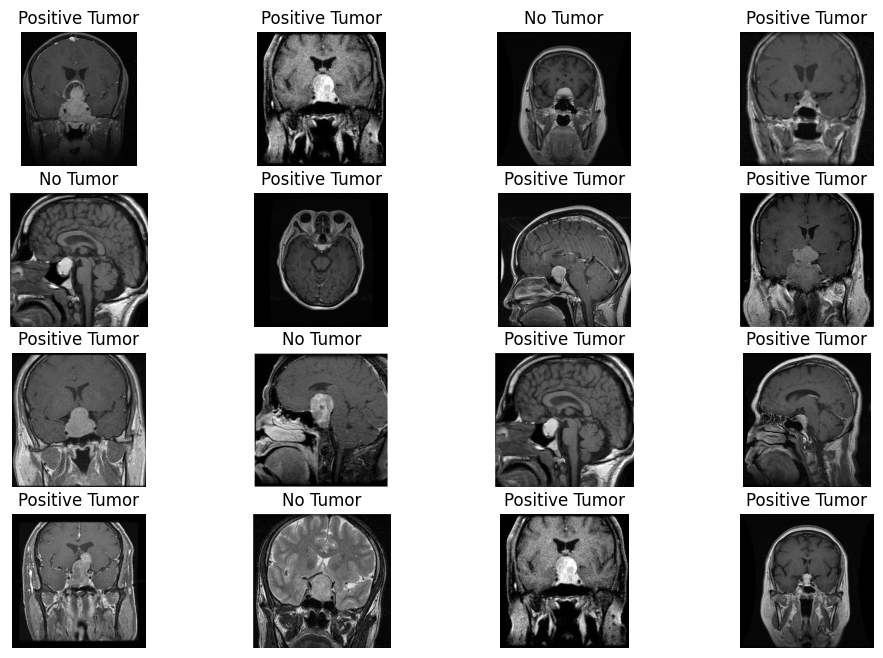

In [65]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/brain_tumour/tumour/Testing')
c=1
for i in os.listdir('/content/brain_tumour/tumour/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/brain_tumour/tumour/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [66]:
from sklearn.metrics import classification_report

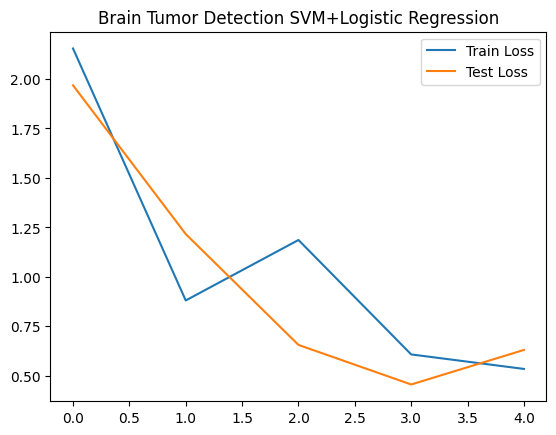

In [71]:
plt.plot(mod.history['loss'], label='Train Loss')
plt.plot(mod.history['val_loss'], label='Test Loss')
plt.title("Brain Tumor Detection SVM+Logistic Regression")
plt.legend()
plt.show()

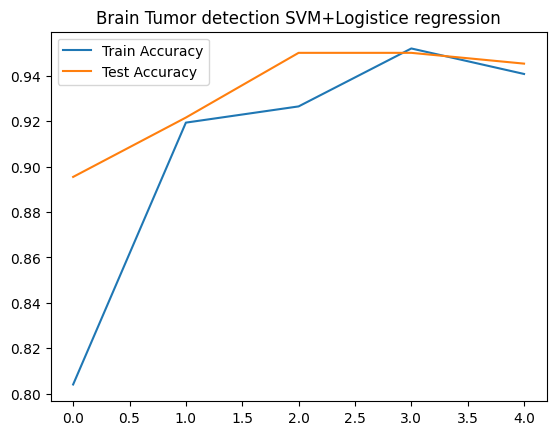

In [69]:
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Test Accuracy')
plt.title("Brain Tumor detection SVM+Logistice regression")
plt.legend()
plt.show()

In [72]:
pred = sv.predict(xtest)

# Calculate the classification report
report = classification_report(ytest, pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92        81
           1       0.94      0.99      0.96       164

    accuracy                           0.95       245
   macro avg       0.96      0.93      0.94       245
weighted avg       0.95      0.95      0.95       245

